# Scraping Laptops data from bestbuy canada website


This is an example of data scraping from bestbuy canada website. This notebook is an exercise I did in order to help me decide what computer can I buy for my personnal project in data science. So I decided to focus on one website and see what it can tell me about my project. I essentially make some request on the website of bestbuy and I use BeautifulSoup to parse the html file I got from the requests and collect automatically data about computer on the website. 
After getting my csv file, I clean it and take at look at the desciptive statistic measures  and visualize it.

In [1]:
# I use get from requests package to read the url I selected with text function
from requests import get
url = 'https://www.bestbuy.ca/en-ca/category/laptops-macbooks/20352.aspx?type=product&page=1&filter=category%253aComputers%2B%2526%2BTablets%253bcategory%253aLaptops%2B%2526%2BMacBooks%253bcustom0ramsize%253a4'
response = get(url)
print(response.text[:1000])



<!doctype html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en-CA" xml:lang="en-CA" data-ng-app='plp'>

<head id="ctl00_Head1" code-version="6.4.0.89"><script type="text/javascript">
    var data_layer = {"section":"Main","template":"Subclass","subTemplate":"SkuListingList","breadcrumb2":"Computers & Tablets","breadcrumb3":"Laptops & MacBooks","breadcrumb4":null,"breadcrumb5":null,"breadcrumb6":null,"language":"English","recognized":"Anonymous","pageIdentifier":"Laptops & MacBooks","storeID":null,"catID":"20352","prodRating":"","numProdReviews":"","sellerRating":null,"numSellerReviews":null,"prodID":[],"prodPrice":[],"prodQty":[],"prodSavings":[],"prodDiscount":[],"prodTotalSavings":[],"prodName":[],"prodShippingPrice":[],"productBundle":[],"bundlePrice":[],"bundleQty":[],"bundleName":[],"bundleSavings":[],"bundleDiscount":[],"bundleTotalSavings":[],"orderLevelDiscount":null,"productType":[],"skuType":[],"daysToDeliver":[],"brandStore":null,"brand":null,"productOnSale":nul


## Use beautifulSoup to parse the HTML content

In [2]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
laptop_containers = html_soup.find_all('li', class_='listing-item equal-height-container')
print(type(laptop_containers))
print(len(laptop_containers))

<class 'bs4.element.ResultSet'>
32


In [4]:
laptop_containers = html_soup.find_all('div', class_='item-inner clearfix')
print(type(laptop_containers))
print(len(laptop_containers))

<class 'bs4.element.ResultSet'>
32


## Extracting the data for a single laptop
We can access the first container, which contains information about a single laptop, by using list notation on laptop_containers.

In [5]:
first_laptop = laptop_containers[0]

In [6]:
first_laptop

<div class="item-inner clearfix">
<div class="prod-image">
<a href="/en-ca/product/asus-l406ma-14-laptop-star-grey-intel-celeron-n4000-64gb-hdd-4gb-ram-windows-10/13018569.aspx?"><img height="150" src="https://multimedia.bbycastatic.ca/multimedia/products/150x150/130/13018/13018569.jpg" width="150"/></a>
<div class="compare-checkbox">
<label>
<input data-sku="13018569" type="checkbox"/>
<span>Compare</span>
</label>
<a class="btn btn-compare hidden" href="#">Compare selections</a>
</div>
</div><!-- prod-image end-->
<div class="prod-info">
<div class="price-wrapper price-medium">
<div class="prodprice">
<span class="amount">$350.89</span>
</div>
<!--<div class="prod-ehf"> + $0.90 Environmental Handling Fee</div>-->
<div class="prod-ehf"> $349.99 + $0.90 Environmental Handling Fee</div>
</div>
<h4 class="prod-title"><a href="/en-ca/product/asus-l406ma-14-laptop-star-grey-intel-celeron-n4000-64gb-hdd-4gb-ram-windows-10/13018569.aspx?">ASUS L406MA 14" Laptop - Star Grey (Intel Celeron N40

## The laptop name

In [7]:
first_laptop.div

<div class="prod-image">
<a href="/en-ca/product/asus-l406ma-14-laptop-star-grey-intel-celeron-n4000-64gb-hdd-4gb-ram-windows-10/13018569.aspx?"><img height="150" src="https://multimedia.bbycastatic.ca/multimedia/products/150x150/130/13018/13018569.jpg" width="150"/></a>
<div class="compare-checkbox">
<label>
<input data-sku="13018569" type="checkbox"/>
<span>Compare</span>
</label>
<a class="btn btn-compare hidden" href="#">Compare selections</a>
</div>
</div>

In [8]:
first_laptop.a

<a href="/en-ca/product/asus-l406ma-14-laptop-star-grey-intel-celeron-n4000-64gb-hdd-4gb-ram-windows-10/13018569.aspx?"><img height="150" src="https://multimedia.bbycastatic.ca/multimedia/products/150x150/130/13018/13018569.jpg" width="150"/></a>

In [9]:
first_laptop.h4

<h4 class="prod-title"><a href="/en-ca/product/asus-l406ma-14-laptop-star-grey-intel-celeron-n4000-64gb-hdd-4gb-ram-windows-10/13018569.aspx?">ASUS L406MA 14" Laptop - Star Grey (Intel Celeron N4000/64GB HDD/4GB RAM/Windows 10)</a></h4>

In [10]:
first_laptop.h4.a

<a href="/en-ca/product/asus-l406ma-14-laptop-star-grey-intel-celeron-n4000-64gb-hdd-4gb-ram-windows-10/13018569.aspx?">ASUS L406MA 14" Laptop - Star Grey (Intel Celeron N4000/64GB HDD/4GB RAM/Windows 10)</a>

In [11]:
first_name = first_laptop.h4.a.text

In [12]:
first_name

'ASUS L406MA 14" Laptop - Star Grey (Intel Celeron N4000/64GB HDD/4GB RAM/Windows 10)'

## Laptop price

In [13]:
first_price = first_laptop.find('span', class_='amount')

In [14]:
first_price

<span class="amount">$350.89</span>

In [15]:
first_price = first_price.text

In [16]:
first_price

'$350.89'

## Laptop rating

In [17]:
def Rating(c):
    c = c.find('div', class_="rating-stars-yellow")
    c = c['style']
    c = c.split()[1]
    c = float(c[:-2])
    return c

In [18]:
Rating(first_laptop)

90.0

## Number of votes

In [19]:
first_vote = first_laptop.find('div', class_="rating-num")

In [20]:
first_vote = first_vote.text

In [21]:
first_vote

'(2)'

## The script for a single page


In [22]:
# Lists to store the scraped data in
names = []
prices = []
ratings = []
votes = []

# Extract data from individual movie container
for container in laptop_containers:

    # If the movie has Metascore, then extract:
    if container.find('div',  class_='rating-stars-yellow') is not None:

        # The name
        name = first_laptop.h4.a.text
        names.append(name)

        # The price
        price = container.find('span', class_='amount').text
        prices.append(price)

        # The rating
        rating = Rating(container)
        ratings.append(rating)

        # The number of votes
        vote = container.find('div', class_="rating-num").text
        votes.append(vote)

In [23]:
import pandas as pd

test_df = pd.DataFrame({'laptop': names,
                       'price': prices,
                       'rating': ratings,
                        'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
laptop    21 non-null object
price     21 non-null object
rating    21 non-null float64
votes     21 non-null object
dtypes: float64(1), object(3)
memory usage: 752.0+ bytes
None


,laptop,price,rating,votes
0,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$350.89,90.0,(2)
1,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$300.89,40.0,(1)
2,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$430.89,76.0,(5)
3,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$139.99,66.6,(9)
4,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$550.89,100.0,(1)
5,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$430.89,100.0,(7)
6,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$300.89,80.0,(4)
7,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$400.89,20.0,(1)
8,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$260.89,65.0,(8)
9,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$300.89,82.6,(8)


In [24]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

## The script for multiple pages

In [25]:
from IPython.core.display import clear_output

In [26]:
from warnings import warn

warn("Warning Simulation")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Warning Simulation
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
pages = [str(i) for i in range(1,4)]
Ram_url = ['2', '4',  '8', '12', '16','32']

In [28]:
def URL(s,t):
    url = 'https://www.bestbuy.ca/en-ca/category/laptops-macbooks/20352.aspx?type=product&page='+s+'&filter=category%253aComputers%2B%2526%2BTablets%253bcategory%253aLaptops%2B%2526%2BMacBooks%253bcustom0ramsize%253a8'+ t    
    print(url)

In [29]:
URL('s','t')

https://www.bestbuy.ca/en-ca/category/laptops-macbooks/20352.aspx?type=product&page=s&filter=category%253aComputers%2B%2526%2BTablets%253bcategory%253aLaptops%2B%2526%2BMacBooks%253bcustom0ramsize%253a8t


In [30]:
url

'https://www.bestbuy.ca/en-ca/category/laptops-macbooks/20352.aspx?type=product&page=1&filter=category%253aComputers%2B%2526%2BTablets%253bcategory%253aLaptops%2B%2526%2BMacBooks%253bcustom0ramsize%253a4'

In [31]:
from time import sleep
from random import randint
from time import time

In [32]:
pages = [str(i) for i in range(1,20)]
Ram_url = ['2', '4',  '8', '12', '16','32', '64']

In [33]:
# Redeclaring the lists to store data in
names = []
prices = []
ratings = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every number of Go of ram in Ram_url
for ram_url in Ram_url:

    # For every page in the interval 1-54
    for page in pages:

        # Make a get request
        response = get('https://www.bestbuy.ca/en-ca/category/laptops-macbooks/20352.aspx?type=product&page='+page+'&filter=category%253aComputers%2B%2526%2BTablets%253bcategory%253aLaptops%2B%2526%2BMacBooks%253bcustom0ramsize%253a'+ ram_url, headers = headers)
       

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 200:
            warn('Number of requests was greater than expected.')  
            break 

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the laptop containers from a single page
        laptops_containers = page_html.find_all('div',  class_='item-inner clearfix')

        # For every computer in laptops_container
        for container in laptops_containers:
            # If the computer has a rating, then:
            if container.find('div',  class_='rating-stars-yellow') is not None:

                # Scrape the name
                name = container.h4.a.text
                names.append(name)

                # Scrape the price 
                price = container.find('span', class_='amount').text
                prices.append(price)

                # Scrape the rating
                rating = Rating(container)
                ratings.append(rating)

                
                # Scrape the number of votes
                vote = container.find('div', class_="rating-num").text
                votes.append(vote)

Request:133; Frequency: 0.08028478076945338 requests/s


In [34]:
laptops_rating = pd.DataFrame({'laptops': names,
                       'prices': prices,
                       'ratings': ratings,
                        'votes': votes})

In [35]:
laptops_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 4 columns):
laptops    272 non-null object
prices     272 non-null object
ratings    272 non-null float64
votes      272 non-null object
dtypes: float64(1), object(3)
memory usage: 8.6+ KB


In [36]:
laptops_rating.to_csv('laptops_rating2019.csv')

In [37]:
laptops_rating.head()

,laptops,prices,ratings,votes
0,"ASUS C202SA 11.6"" Rugged Chromebook - Dark Gre...",$230.89,66.6,(6)
1,"Samsung ChromeBook XE303C12 11.6"", EXYNOS 5 Du...",$179.99,20.0,(1)
2,"Acer CB3 15.6"" Chromebook - Granite Grey (Inte...",$280.85,100.0,(6)
3,"Dell Latitude D620 14.1"" TFT Laptop, Intel Cor...",$159.99,20.0,(1)
4,Lenovo N23 Series Laptop with 4GB RAM and 32GB...,$259.99,60.0,(1)


In [38]:
df = pd.read_csv('laptops_rating2019.csv')

In [39]:
df.head(20)

,Unnamed: 0,laptops,prices,ratings,votes
0,0,"ASUS C202SA 11.6"" Rugged Chromebook - Dark Gre...",$230.89,66.6,(6)
1,1,"Samsung ChromeBook XE303C12 11.6"", EXYNOS 5 Du...",$179.99,20.0,(1)
2,2,"Acer CB3 15.6"" Chromebook - Granite Grey (Inte...",$280.85,100.0,(6)
3,3,"Dell Latitude D620 14.1"" TFT Laptop, Intel Cor...",$159.99,20.0,(1)
4,4,Lenovo N23 Series Laptop with 4GB RAM and 32GB...,$259.99,60.0,(1)
5,5,"Lenovo IdeaPad MIIX 310-10ICR 80SG001FUS 10.1""...",$350.89,60.0,(4)
6,6,"ASUS L406MA 14"" Laptop - Star Grey (Intel Cele...",$350.89,90.0,(2)
7,7,"HP 14"" Laptop - Snow White (Intel Celeron Proc...",$300.89,40.0,(1)
8,8,"Acer Swift 14"" Laptop - Silver (Intel Pentium ...",$430.89,76.0,(5)
9,9,"Refurbished Lenovo ThinkPad L430, Intel Celero...",$139.99,66.6,(9)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
Unnamed: 0    272 non-null int64
laptops       272 non-null object
prices        272 non-null object
ratings       272 non-null float64
votes         272 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 10.7+ KB


# Data cleaning

In [41]:
df['prices'].iloc[0]

'$230.89'

In [42]:
def prix(x):
    if ',' in x:
        x = x.replace(',','')
        return float(x[1:])
    else:
        return float(x[1:])

In [43]:
df['prices'] = [prix(x) for x in df['prices']]

In [44]:
df['prices'].iloc[0]

230.88999999999999

In [45]:
def Remove_parenthese(x):
    y = len(x)-1
    z = x[1:y]
    z = float(z)
    return z

In [46]:
df['votes'] = [Remove_parenthese(x) for x in df['votes']]

In [47]:
float(df['votes'].iloc[120])

4.0

# Descriptive statistic measures of the data

In [48]:
df[['prices', 'ratings', 'votes']].describe()

,prices,ratings,votes
count,272.000000,272.000000,272.000000
mean,1251.537831,75.086029,89.661765
std,974.016698,23.783273,497.596781
min,139.990000,20.000000,1.000000
25%,550.890000,60.000000,1.000000
50%,1000.890000,80.000000,4.000000
75%,1730.890000,96.000000,10.000000
max,9489.000000,100.000000,5977.000000


In [49]:
dfmax = df[df['votes']==5977.000000]

In [50]:
dfmax[['laptops', 'prices', 'ratings']]

,laptops,prices,ratings
60,"Apple MacBook Air 13.3"" (Intel Core i5 1.8 GHz...",1200.89,97.0


In [51]:
dfmax_ratings = df[df['ratings']==100.0]

In [52]:
dfmax_ratings[['laptops', 'prices', 'votes']]

,laptops,prices,votes
2,"Acer CB3 15.6"" Chromebook - Granite Grey (Inte...",280.85,6.0
10,"HP 14"" Laptop - Natural Silver/Ash Silver (Int...",550.89,1.0
11,"ASUS C523NA 15.6"" Touchscreen Chromebook (Inte...",430.89,7.0
22,"Acer R 13 13.3"" Touchscreen 2-in-1 Chromebook ...",450.89,1.0
34,Dell Latitude E6230 Laptop Intel Core i5 3320m...,269.99,1.0
35,"ASUS Transformer Book 10.1"" 2-in-1 Laptop - Gl...",454.99,1.0
43,"Lenovo N42-20 14"" Touchscreen Chromebook (Inte...",400.99,1.0
45,"Acer Chromebook 14 NX.GC2AA.010 14"" Chromebook...",405.58,2.0
51,"Lenovo ThinkPad E575 20H8000HUS 15.6"" 16:9 Not...",902.18,1.0
53,"Lenovo ThinkPad X130e Laptop 11.6"", AMD E450, ...",199.00,1.0


In [53]:
dfmax_ratings['votes'].max()

7.0

# Plotting and analyzing the distributions

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

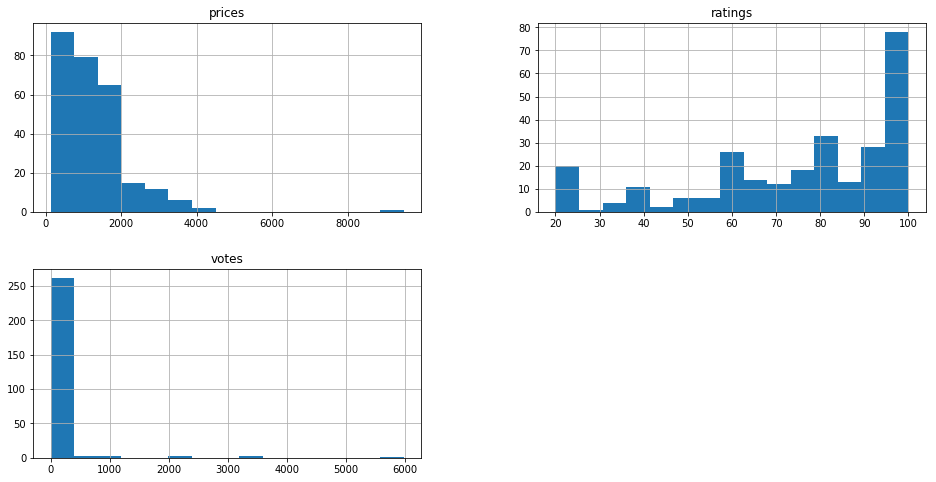

In [55]:
df[['prices', 'ratings', 'votes']].hist(bins=15, figsize = (16,8))
plt.show()

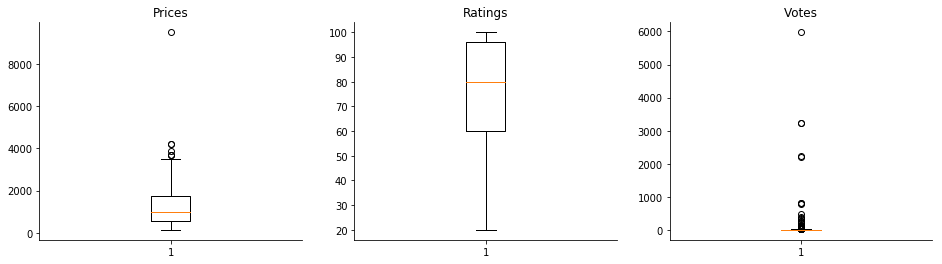

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.boxplot(df['prices']) # bin range = 1
ax1.set_title('Prices')

ax2.boxplot(df['ratings']) # bin range = 10
ax2.set_title('Ratings')

ax3.boxplot(df['votes'])
ax3.set_title('Votes')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()